# Exercise1

This is the first exercise for your computer vision course. After fininshing this exercise you are expected to know:
- How to work with images in OpenCV.
- How to perform image zooming.
- How to enhance the contrast of images through various methods.
- How to apply different operations on pixel values in order to modify images.


# Instructions

- Please provide a proper answer for each part of the questions.
- Use the cells beneath each question for your answer.
- Feel free to add more cells whenever needed.

Good luck!

## Question 1 (15 points)

In computer vision, image zooming is a process that enlarges or reduces an image while preserving or altering its details.

You are provided with an image *einstein.jpg*, and your task is to apply zooming with a factor of 2 using the following two methods: **Pixel replication** and **Zero-order hold**.


**A)** Describe each of the two methods (Pixel replication, Zero-order hold) for image zooming.

**B)** Implement Python code to perform zooming in on the image 'einstein.jpg' using a zoom factor of 2 for each of the two methods. Provide step-by-step explanations of your code for each method.

**C)** For each of the two methods, discuss their advantages and disadvantages. Consider aspects such as image quality, computational complexity, and suitability for different types of images.

**D)** Display the zoomed images for the two methods and report the results. Examine the effects of increasing the zoom factor (e.g., from 2 to 4) on image quality and detail preservation.

**E)** Suggest an improved zooming method and compare its results with the two experimented methods.

You can see the original form of the image below

<img src="einstein.jpg"/>

In [2]:
#Q1-A
#zero order hold : is performed by repeating previous pixel values, thus creating a blocky effect. Example: if we have an image of size(n*n), we can zooming it using zero order method with size (2n)*(2n) 
#pixel Replication : Every pixel of the input picture is replicated n times row-wise and n times column-wise, and the input image gets zoomed. 



In [ ]:
#Q1-B
from matplotlib import pyplot as plt
import cv2
# Load the image
image = cv2.imread('einstein.jpg')
# Get the dimensions of the original image
height, width, _ = image.shape
# Zoom in using Pixel Replication
pixel_replication = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_NEAREST)
# Zoom in using Zero-Order Hold (Nearest-neighbor interpolation)
zero_order_hold = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_NEAREST)
# Save the zoomed images
cv2.imwrite('pixel_replication.jpg', pixel_replication)
cv2.imwrite('zero_order_hold.jpg', zero_order_hold)
# Display the zoomed images (optional)
cv2.imshow('Pixel Replication', pixel_replication)
cv2.imshow('Zero-Order Hold', zero_order_hold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Q1-C
#pixel replication method : 
# advantage : Simple and Fast ,Preserves Sharp Edges,  Suitable for Binary Images
# disadvantage : Limited Quality Improvement , Not Suitable for Continuous Tones

# Zero-Order Hold : 
# advatage : Simple and Fast ,Preserve original pixels 
# disadvatage : Blocky Artifacts , Limited Quality Improvement

In [ ]:
#Q1-D
# Blocky Artifacts: Blocky artifacts become much more noticeable, 
# Loss of Image Quality: The overall image quality deteriorates,
# Blurriness: In images with sharp edges, the blocky artifacts can make the edges appear blurry.


In [ ]:
#Q1-E
# Bilinear interpolation produces a smoother and more visually appealing result
zoomed_bilinear = cv2.resize(image, (width * 4, height * 4), interpolation=cv2.INTER_LINEAR)  #zoom factor is 4 
# Save the zoomed images
cv2.imwrite('zoomed_bilinear.jpg', zoomed_bilinear)
# Display the zoomed images 
cv2.imshow('Bilinear Interpolation', zoomed_bilinear)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Question 2 (15 points)

You are given a low-contrast grayscale image, 'low_contrast.jpg', which has lost significant details due to insufficient contrast. Your task is to enhance the image using logarithmic and gamma correction techniques. Additionally, you need to plot the histograms of the original and enhanced images for comparison.

<img src="low_contrast.jpg" width="200" height="200"/>

**A)** Normalize the image to ensure its pixel values are within range (0 to 1).

**B)** Describe each of the two methods (Logarithmic correction and Gamma correction) for contrast stretching.

**C)** Apply logarithmic contrast stretching to 'low_contrast.jpg' using the formula:

enhanced_pixel_value = c * log(1 + original_pixel_value)

Choose an appropriate constant 'c' to scale the enhanced pixel values to the range (0 to 1).

**D)** Apply gamma correction to 'low_contrast.jpg'.
Choose a suitable 'gamma' value for enhancing the image's contrast.

**E)** After applying both contrast enhancement techniques, plot histograms for the original and enhanced images on a single figure.

*X-axis:* Pixel intensity values (0 to 1)  
*Y-axis:* Frequency of each intensity value in the image

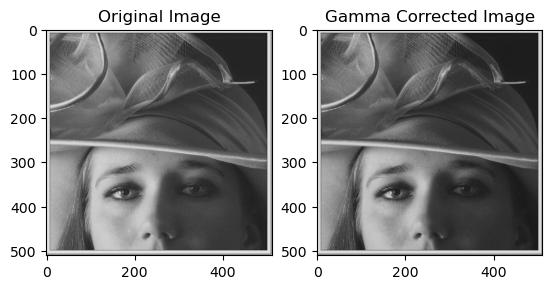

In [15]:
#Q2-A
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the image
image = cv2.imread('low_contrast.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
# Normalize the image to the 0-1 scale
normalized_image = image / 255.0


In [ ]:

#Q2-B
# 1. Logarithmic Correction:
# Objective: The logarithmic correction method is used to increase the visibility of details in the darker regions of an image. It is particularly effective for images with low-contrast, where important details might be hidden in the shadows.
# Process: In logarithmic correction, each pixel value is transformed using a logarithmic function. The formula used is typically new_pixel_value = c * log(1 + original_pixel_value), where c is a constant that scales the result. The logarithm compresses the lower pixel values, making them more distinguishable and spreading them over a wider range.
# Advantages: Logarithmic correction enhances the details in darker areas while maintaining details in the brighter regions of the image. It's suitable for images with underexposed or low-contrast areas.
# Disadvantages: It may not be suitable for all types of images, particularly those with already good contrast, as it can sometimes overemphasize dark areas.

# 2. Gamma Correction:
# Objective: Gamma correction is used to adjust the overall contrast of an image. It allows you to control the brightness and contrast of an image by modifying the gamma value. This method can be used for both contrast enhancement and reduction.
# Process: In gamma correction, each pixel value is transformed using the formula new_pixel_value = c * (original_pixel_value ^ gamma), where c is a scaling constant, and gamma is the gamma value. Adjusting the gamma value can change the image's overall brightness and contrast. A gamma value less than 1 will lighten the image, while a value greater than 1 will darken it.
# Advantages: Gamma correction is a versatile method that allows you to fine-tune the overall contrast and brightness of an image. It is useful for a wide range of image enhancement tasks, including both brightening and darkening.
# Disadvantages: Improper gamma adjustments can lead to undesirable effects, such as loss of detail in highlights or shadows. It may not work well for images with extreme brightness or contrast issues.



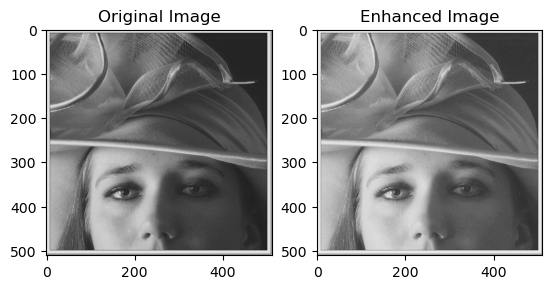

In [6]:
#Q2-C
image = cv2.imread('low_contrast.jpg', 0)  # Load the image in grayscale
c = 255 / np.log(1 + np.max(image))  # Calculate the constant 'c'

contrast_stretched = c * np.log(1 + image)  # Apply the formula to enhance the image
contrast_stretched = np.uint8(contrast_stretched)  # Convert the enhanced image back to uint8

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contrast_stretched, cmap='gray') #show contrast stretched image 
plt.title('Enhanced Image')
plt.savefig("Q2_C_Enhanced_Image.png")
cv2.waitKey(0)
cv2.destroyAllWindows()

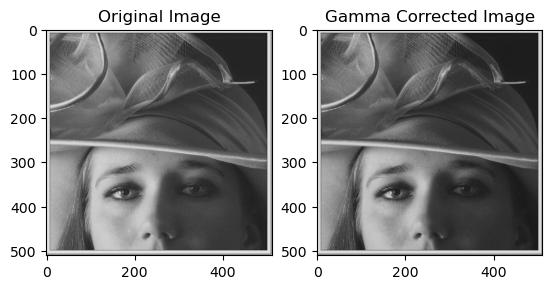

In [7]:
#Q2-D

# Choose a suitable gamma value (experiment with different values)
image = cv2.imread('low_contrast.jpg', 0) # Load the image in gray scale mode
gamma = 1.5 # Choose a suitable gamma value (experiment with different values)
c = 0.75 # Choose a suitable C value (experiment with different values)
gamma_corrected = c * np.power(image/255.0, gamma)
gamma_corrected = np.uint8(gamma_corrected*255) #apply c , gamma value to original loaded image 
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Corrected Image')
plt.savefig("Q2_D_gamma_corrected.png")

plt.show()

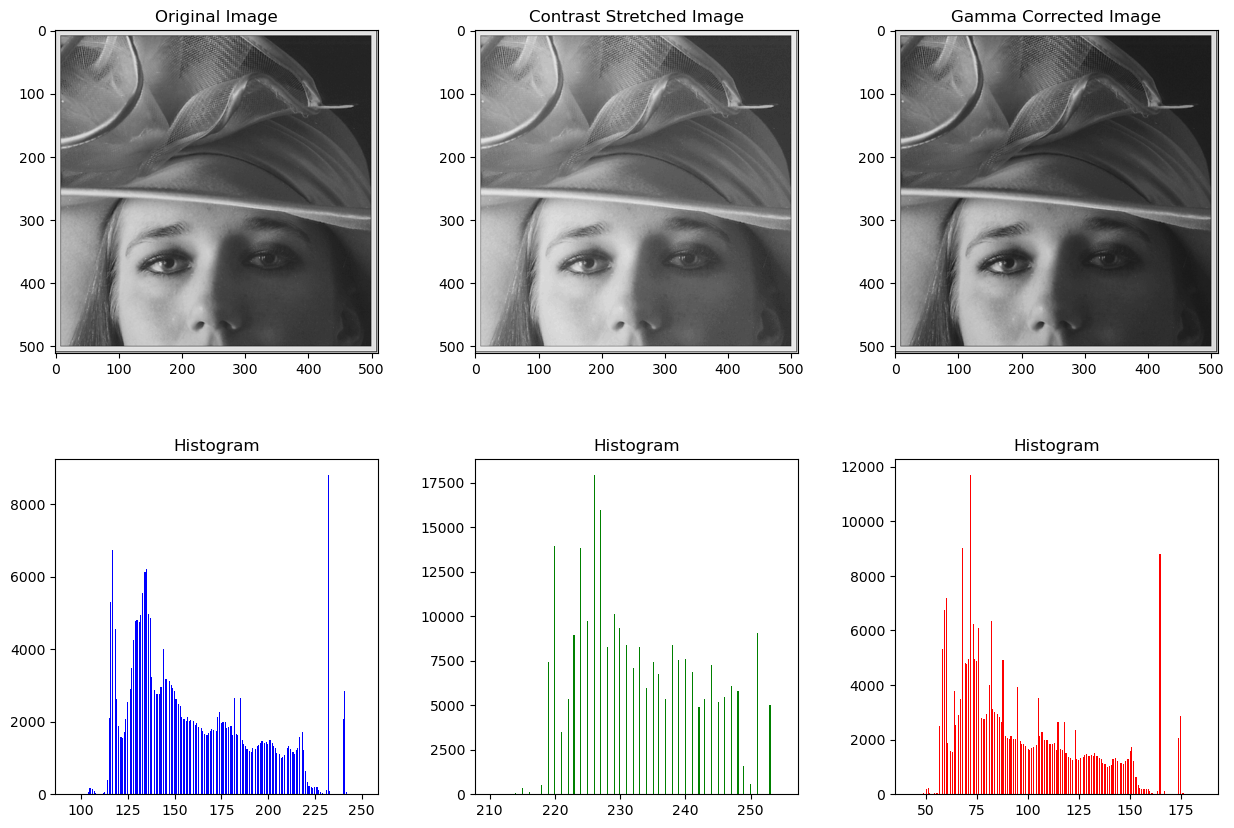

In [16]:
#Q2-E

# Read the original image
image = cv2.imread('low_contrast.jpg', 0)

# Plotting the images and histograms
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# plot Original Image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[1, 0].hist(image.ravel(), bins=256, color='blue')
axs[1, 0].set_title('Histogram')

# plot contrast Stretched Image
axs[0, 1].imshow(contrast_stretched, cmap='gray')
axs[0, 1].set_title('Contrast Stretched Image')
axs[1, 1].hist(contrast_stretched.ravel(), bins=256, color='green')
axs[1, 1].set_title('Histogram')

# plot Gamma Corrected Image
axs[0, 2].imshow(gamma_corrected, cmap='gray')
axs[0, 2].set_title('Gamma Corrected Image')
axs[1, 2].hist(gamma_corrected.ravel(), bins=256, color='red')
axs[1, 2].set_title('Histogram')

# Adjusting subplot spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Saving the figure
plt.savefig('histograms.png')

# Display the figure
plt.show()

## Question 3 (15 points)

Histogram equalization is a technique widely used in image processing to enhance the contrast of an image by redistributing the intensity values. In this question, you will explore the concept of histogram equalization step by step. Use the image below for this question.

<img src="lena_gray.gif" width="200" height="200"/>

**A)** Normalize the image to ensure its pixel values are within range (0 to 1).

**B)** Calculate and plot the histogram of the original image. Analyze the histogram to understand the distribution of pixel intensities.

**C)** Implement the histogram equalization algorithm on the original image then calculate and plot the histogram of the equalized image.

**D)** Display the original image, the histogram-equalized image, and their respective histograms side by side for comparison.

**E)** Analyze and compare the visual differences between the original and equalized image. Discuss how histogram equalization has affected the distribution of pixel intensities.

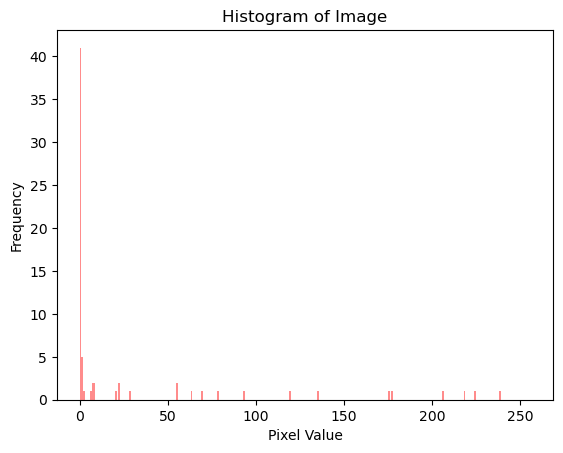

In [18]:
#Q3-A
import cv2
from PIL import Image
from matplotlib import pyplot as plt

import numpy as np

image = Image.open("lena_gray.gif")
grayscale_image = image.convert("L") #convert loaded image to gray scale 

histogram = grayscale_image.histogram() #plot histogram of image

plt.hist(histogram, bins=range(257), color='red', alpha=0.45) #determine parameters and call .hist method to plot 
plt.xlabel('Pixel Value') 
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()


In [36]:
import cv2 
# import Numpy 
import numpy as np 
  
# read a image using imread 
cap = cv2.VideoCapture("lena_gray.gif")
_ , img = cap.read()
cap.release()
 
  
# creating a Histograms Equalization 
# of a image using cv2.equalizeHist() 
equ = cv2.equalizeHist(img) 
  
# stacking images side-by-side 
res = np.hstack((img, equ)) 
  
# show image input vs output 
plt.show(img)  
cv2.waitKey(0) 
cv2.destroyAllWindows() 

[ WARN:0@1864.508] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@1864.508] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'


OpenCV: Couldn't read video stream from file "lena_gray.gif"
[ERROR:0@1864.511] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file)

In [2]:
import cv2
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt


# Load the GIF image using PIL
gif_image = Image.open('lena_gray.gif')

# Create an empty list to store the equalized frames
equalized_frames = []

# Loop through each frame of the GIF
for frame in range(gif_image.n_frames):
    # Select the current frame
    gif_image.seek(frame)
    
    # Convert the frame to OpenCV format
    opencv_frame = cv2.cvtColor(np.array(gif_image), cv2.COLOR_RGB2BGR)
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(opencv_frame, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to the grayscale frame
    equalized_frame = cv2.equalizeHist(gray_frame)
    
    # Add the equalized frame to the list
    equalized_frames.append(equalized_frame)
    
cv2.imshow('', equalized_frame[:])
# Create a new GIF file to store the equalized frames
output_image = cv2.VideoWriter('output.gif', cv2.VideoWriter_fourcc(*'XVID'), 30, (opencv_frame.shape[1], opencv_frame.shape[0]), False)
cv2.imwrite('lena_equalization.png' ,equalized_frame[:] )
# Write each equalized frame to the new GIF file
for frame in equalized_frames:
    output_image.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR))


# Release the video writer object
output_image.release()

[ WARN:0@283.832] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@283.837] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): output.gif in function 'icvExtractPattern'




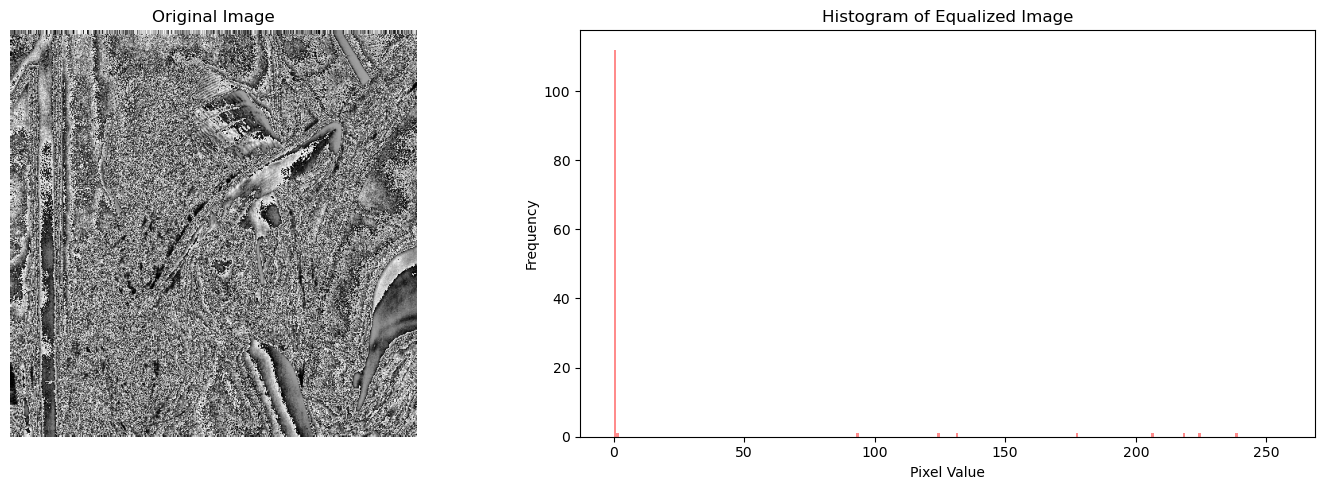

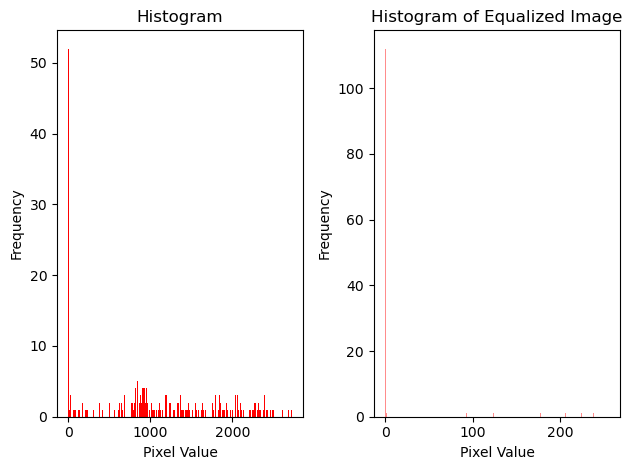

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [26]:
#q2-D
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open("lena_gray.gif")

# Convert the image to grayscale
image = image.convert('L')

# Calculate the histogram
histogram = image.histogram()

plt.subplot(1, 2, 2)
plt.hist(equalized_histogram, bins=range(257), color='red', alpha=0.45) #determine parameters and call .hist method to plot 
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Equalized Image')

# Plot the histogram
plt.subplot(1, 2, 1)
plt.hist(histogram, bins=256, color='red') #determine parameters and call .hist method to plot 
# Set the title and labels
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

res = np.hstack((grayscale_image ,equalized_image ))  #show both original and new image side by side to comparsion
# show image input vs output 
  


In [ ]:
#q3-E
# histogram equalization can significantly improve the distribution of pixel intensities in an image, making it more visually appealing and enhancing the visibility of details. It achieves this by spreading the pixel values over the entire intensity range, resulting in a more balanced and uniform distribution of intensities.

## Question 4 (15 points)

The image square.gif contains two square objects. Pixels in the first square have the intensity 
of 150 while those in the second square have the intensity of 220. Read the image and do the following: 

**A)**  The small square is to be translated by 40 pixels in both directions. 

**B)**  The large square is to be rotated by 60 degrees counter clockwise. 

Write the code to perform these transformations. Show the image before and after transformation on the 
same figure.

you can see the original form of the image below:

<img src="square.gif" width="200" height="200"/>

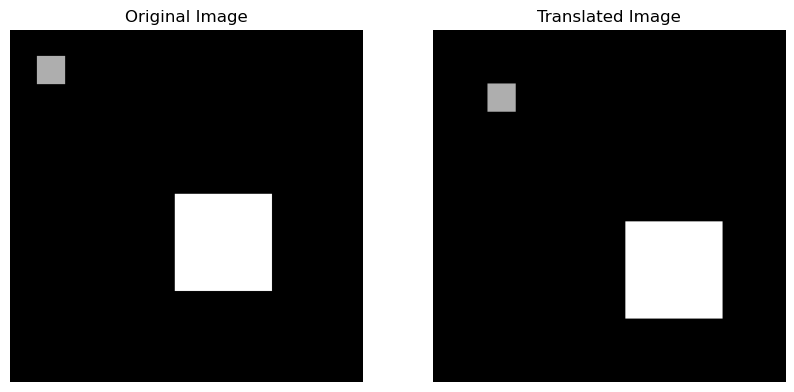

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = plt.imread('square.gif')

# Define the translation amount
translation = 40

# Translate the first square
square1 = np.where(image == 150)
translated_square1 = (square1[0] + translation, square1[1] + translation)

# Translate the second square
square2 = np.where(image == 220)
translated_square2 = (square2[0] + translation, square2[1] + translation)

# Create a new image with the translated squares
translated_image = np.zeros_like(image)
translated_image[translated_square1] = 150
translated_image[translated_square2] = 220

# Display the original and translated images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(translated_image, cmap='gray')
axs[1].set_title('Translated Image')
axs[1].axis('off')

plt.show()

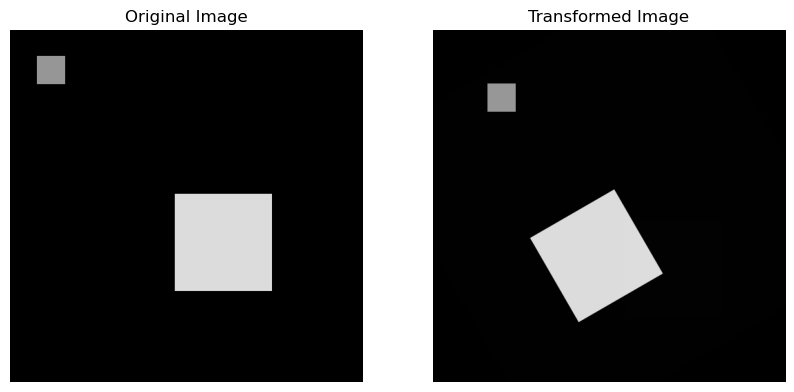

In [15]:
import copy
import cv2
import numpy as np
import matplotlib.pyplot as plt

#we have to create add two created copy of image to make final image
ex4_image = plt.imread('square.gif') #read image

#create deep copy of images 
copy1 = copy.deepcopy(ex4_image)
copy2 = copy.deepcopy(ex4_image) 

#keep  big square in copy2 
copy2 = np.where(copy2 < 160, copy2, 1) 
#transLating it 
M = np.float32([[1, 0, 40], [0, 1, 40]]) 
copy2 = cv2.warpAffine(copy2, M, (copy2.shape[1], copy2.shape[0])) 
#keep smaLL square in copy 1
copy1 = np.where(copy1 > 160, copy1, 1) 
rotation_matrix = cv2.getRotationMatrix2D((copy1.shape[1]/2, copy1.shape[0]/2), -60, 1)  # rotate big sqaure counter clock wise wise by 60 degree
copy1 = cv2.warpAffine(copy1, rotation_matrix, (copy1.shape[1], copy1.shape[0])) 

final = copy1 + copy2 #finaL picture is the sum of copyl and copy2 

plt.figure(figsize=(10,8)) 
plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(ex4_image, cmap='gray', vmin=0, vmax=255) 
plt.subplot(1,2,2) 
plt.title('Transformed Image')
plt.axis('off') 
plt.imshow(final, cmap='gray', vmin=0, vmax=255); 

plt.savefig("rotateed_big_square.png")

## Question 5 (10 points)

For the image skeleton.gif, try to modify the normalized image using the following functions: 

<img src="functions.png" width="500" height="250"/>

Show the results in each case. Which function produces the best result in your opinion? Discuss your 
results.

You can see the original form of the image below:

<img src="skeleton.gif" width="200" height="200"/>

In [36]:
from PIL import Image
import numpy as np

# Load the image
image = Image.open("skeleton.gif")
# Convert the image to a numpy array
image_array = np.array(image)

# Define constants for the formulas
c = 2.0

# Apply the first formulation: g(x,y) = e^c * f(x,y)
formula_1_res = np.exp(c) * image_array

# Apply the second formulation: g(x,y) = c * log10(f(x,y) + 1)
formula_2_res = c * np.log10(image_array )+1

# Apply the third formulation: g(x,y) = if f(x,y) < 0.1 then f(x,y) else 2 * f(x,y)
formula_3_res = np.where(image_array < 0.1, image_array, 2 * image_array)

# You can save the resulting images using Pillow if needed
res_image_1 = Image.fromarray(np.uint8(formula_1_res))
res_image_2 = Image.fromarray(np.uint8(formula_2_res))
res_image_3 = Image.fromarray(np.uint8(formula_3_res))

res_image_1.save("formula_1_result.png")
res_image_2.save("formula_2_result.png")
res_image_3.save("formula_3_result.png")


/var/folders/38/1q8j80g51tsg10szxpb8j9qm0000gn/T/ipykernel_65994/1727757905.py:16: RuntimeWarning: divide by zero encountered in log10
  formula_2_result = c * np.log10(image_array )+1
/var/folders/38/1q8j80g51tsg10szxpb8j9qm0000gn/T/ipykernel_65994/1727757905.py:23: RuntimeWarning: invalid value encountered in cast
  result_image_2 = Image.fromarray(np.uint8(formula_2_result))
